<center> <b> <Big> Credit Card Fraud Detection </Big> </b> </center>

&#9999; Description:

This project try to classify credit card fraudulent/legit transactions. I used Random Forest Classifier to build the model, created a training and test datasets to check the fit of the model. It's becoming clear that the data is skewed and will require proper resampling to train the model effectively. I used a Synthetic Minority Over-sampling Technique (SMOTE) to solve the skewed data problem.

Note:
<ul>
 <li>Class 0 = Legit transactions</li>
 <li>Class 1 = Fraudulent transactions</li>
</ul>

DataSet and content can be found https://www.kaggle.com/mlg-ulb/creditcardfraud

&copy; *Artur Saakyan*

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn import ensemble
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("creditcard.csv") # read csv file

# Analysis of dataset and preparation for training

In [3]:
df.shape # the dimensionality of the df

(284807, 31)

In [4]:
df.head() # the first 5 rows of the df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
count_Class = pd.value_counts(df["Class"]) # graph of the number of elements in 'Class'
count_Class

0    284315
1       492
Name: Class, dtype: int64

 ## &#9993;  <b> unbalanced data </b>

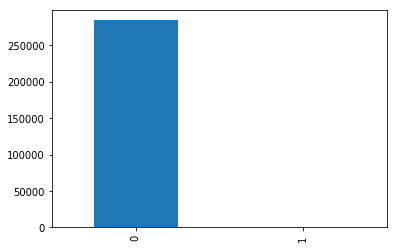

In [6]:
count_Class.plot(kind='bar') # visualization of the "Class" feature

In [7]:
df['norm_Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std() # normalization on quantitative trait
df.drop(['Time', 'Amount'], axis=1, inplace=True) # delete columns 'Time', 'Amount'

In [8]:
y = df['Class']
X = df.drop('Class', axis=1)

In [9]:
X.columns # all columns in the X

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'norm_Amount'],
      dtype='object')

## oversampling 
(only for the training data)

In [10]:
# create a training dataset and a test dataset
# training dataset = build + validate the model
# treat the test dataset as the unseen new data (like in production)

training_features, test_features, \
training_target, test_target = train_test_split(X, y, test_size=0.1, random_state=12)

In [11]:
X_train, X_validate, \
y_train, y_validate = train_test_split(training_features, training_target, test_size = 0.1, random_state=12)

In [12]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Learning process (Random Forest Classifier)

In [13]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=12)
clf_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

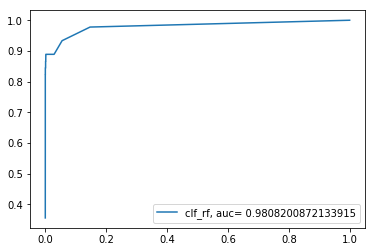

AUC (Random Forest): 0.9808200872133915


In [14]:
# AUC: Area Under the ROC Curve
# AUC measures the entire two-dimensional area underneath the entire ROC curve 
# (think integral calculus) from (0,0) to (1,1).

y_pred_proba_rf = clf_rf.predict_proba(test_features)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(test_target,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(test_target, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label="clf_rf, auc= " + str(auc_rf))
plt.legend(loc = 4)
plt.show()

# Print AUC_RF
auc_rf = np.trapz(tpr_rf, fpr_rf)
print('AUC (Random Forest):', auc_rf)

# Learning process (Gradient Boosted Trees)

In [15]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=12)
gbt.fit(X_train_res, y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=12, subsample=1.0, verbose=0,
              warm_start=False)

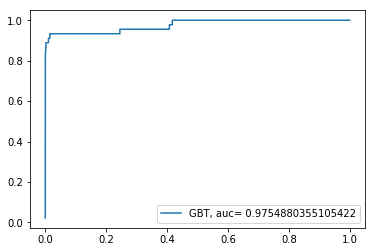

AUC (GBT): 0.9754880355105422


In [16]:
# AUC: Area Under the ROC Curve
# AUC measures the entire two-dimensional area underneath the entire ROC curve 
# (think integral calculus) from (0,0) to (1,1).

y_pred_proba_gbt = gbt.predict_proba(test_features)[::,1]
fpr_gbt, tpr_gbt, _ = metrics.roc_curve(test_target,  y_pred_proba_gbt)
auc_gbt = metrics.roc_auc_score(test_target, y_pred_proba_gbt)
plt.plot(fpr_gbt, tpr_gbt, label="GBT, auc= " + str(auc_gbt))
plt.legend(loc = 4)
plt.show()

# Print AUC_GBT
auc_gbt = np.trapz(tpr_gbt, fpr_gbt)
print('AUC (GBT):', auc_gbt)